In [98]:
from IPython.display import clear_output
!pip install gdown==v4.6.3
clear_output()
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1Lgp5-Z4eUPnygsXB3lXJq6dGyZ4NJ685
clear_output()
df = pd.read_csv('2.2 - cgpt_labelled_trim.csv', index_col=0)

In [ ]:
df.head()

,title,writer,pony,dialog,emotion_chatgpt,season
index,,,,,,
3,"Friendship is Magic, part 1",Lauren Faust,Twilight Sparkle,...and harmony has been maintained in Equestri...,surprise,1
5,"Friendship is Magic, part 1",Lauren Faust,Twilight Sparkle,"Oh, sorry, girls... I've got a lot of studying...",neutral,1
7,"Friendship is Magic, part 1",Lauren Faust,Twilight Sparkle,I know I've heard of the Elements of Harmony.,neutral,1
9,"Friendship is Magic, part 1",Lauren Faust,Twilight Sparkle,Spike! Spi-ike! Spike?,surprise,1
10,"Friendship is Magic, part 1",Lauren Faust,Twilight Sparkle,"There you are. Quick, find me that old copy of...",surprise,1


In [ ]:
# 1. Character Emotional Profile Over Time (graph the emotion distribution by episodes)
# 2. Episodes plot emotional pattern
# 3. Interaction-Based Emotional Dynamics (looking at each episode, see the correlation of emotions between the characters)
# 4. Comparison Across Characters (compare emotions between characters over seasons)
# 5. Impact of Writers on Emotion (see if some writers have impact on the distribution of emotions)
# 6. Clustering of episodes (but on what?) [distribution of emotions {this is time unrelated}] [distribution of characters appearences?]
# 7. Are some emotions more prevalent in specific parts of the story? (last lines are mostly joyful?)

##### 1. Character Emotional Profile Over Time (graph the emotion distribution by season)

In [ ]:
ponies = list(df["pony"].unique())

In [ ]:
ponies

['Twilight Sparkle',
 'Spike',
 'Applejack',
 'Apple Bloom',
 'Rainbow Dash',
 'Rarity',
 'Fluttershy',
 'Pinkie Pie',
 'Scootaloo',
 'Sweetie Belle',
 'Discord',
 'Starlight Glimmer']

In [ ]:
grouped_episodes = df.groupby('title')

characters = list(df["pony"].unique())

# {"episode_title": {"twilight":{"joy": 0,"anger": 2},"apple":{"joy": 0, "anger": 1}}}

# List of all possible emotions
emotions = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

# Initialize the data structure
character_emotion_by_episode = {}

for episode_title, lines in grouped_episodes:
    episode_df = df[df['title'] == episode_title]  # Filter the DataFrame for the current episode title

    # Initialize episode title in character_emotion_by_episode if not present
    if episode_title not in character_emotion_by_episode:
        character_emotion_by_episode[episode_title] = {pony: {em: 0 for em in emotions} for pony in characters}

    for index, row in episode_df.iterrows():
        pony = row["pony"]
        emotion = row["emotion_chatgpt"]

        # Increment the emotion count
        character_emotion_by_episode[episode_title][pony][emotion] += 1

In [ ]:
for episode, characters in character_emotion_by_episode.items():
    for character, emotions in characters.items():
        total_emotions = sum(emotions.values())
        if total_emotions > 0:
            for emotion, count in emotions.items():
                percentage = (count / total_emotions) * 100
                character_emotion_by_episode[episode][character][emotion] = percentage

In [ ]:
# Assuming your DataFrame with season information is called df_seasons
# and your data structure is called character_emotion_data

# Create a mapping from episode titles to seasons
title_to_season = pd.Series(df.season.values, index=df.title).to_dict()

# Add the season info to the data structure at the episode level
for episode_title in character_emotion_by_episode.keys():
    season = title_to_season.get(episode_title)
    if season is not None:
        # If the episode title exists in the mapping, add the season info
        character_emotion_by_episode[episode_title]['season'] = season
    else:
        # If the episode title does not exist in the mapping, handle it accordingly (e.g., log a message)
        print(f"Season info for '{episode_title}' not found.")

# Now, character_emotion_data should have the season info added at the episode level


In [ ]:
# Example of restructuring the data to include a 'characters' key

new_character_emotion_by_episode = {}

for episode, emotions in character_emotion_by_episode.items():
    # Extract the season information
    season = emotions.pop('season', None)  # Use a default value if 'season' key is missing
    # Create a new entry with 'characters' key
    new_character_emotion_by_episode[episode] = {
        'season': season,
        'characters': emotions  # The rest of the data becomes the value for 'characters' key
    }


In [ ]:

# List of emotions to plot
emotions_to_plot = ['anger', 'disgust', 'fear', 'sadness', 'surprise','joy']

for character_to_plot in characters:
    # Create a dictionary to hold emotion data for each season
    season_emotion_data = {}

    # Iterate through each episode and organize emotion data by season
    for episode_name, data in new_character_emotion_by_episode.items():
        season = data.get('season')
        if season not in season_emotion_data:
            season_emotion_data[season] = {emotion: [] for emotion in emotions_to_plot}
            season_emotion_data[season]['episode_names'] = []
        character_data = data['characters'].get(character_to_plot, {})
        for emotion in emotions_to_plot:
            season_emotion_data[season][emotion].append(character_data.get(emotion, 0))
        season_emotion_data[season]['episode_names'].append(episode_name)

    # Determine the number of seasons and create the appropriate number of subplots
    num_seasons = len(season_emotion_data)
    if num_seasons > 0:
        fig, axs = plt.subplots(num_seasons, 1, figsize=(15, 5 * num_seasons), constrained_layout=True)
        if num_seasons == 1:
            axs = [axs]

        # Plot the emotion data for each season in its own subplot
        for ax, (season, data) in zip(axs, sorted(season_emotion_data.items())):
            episodes = data['episode_names']
            for emotion in emotions_to_plot:
                ax.plot(episodes, data[emotion], label=emotion, marker='o')
            ax.set_title(f'Season {season}')
            ax.set_xlabel('Episodes')
            ax.set_ylabel('Emotion Percentage')
            ax.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.grid(True)
            ax.set_xticks(episodes)
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

        # Set a main title for the entire figure
        fig.suptitle(f'Emotion Evolution for {character_to_plot} across Seasons', fontsize=16)

        # Save and show the figure with all subplots
        plt.savefig(f"{character_to_plot}.png")
        plt.show()
    else:
        print(f"No season data available to plot for {character_to_plot}.")



Output hidden; open in https://colab.research.google.com to view.

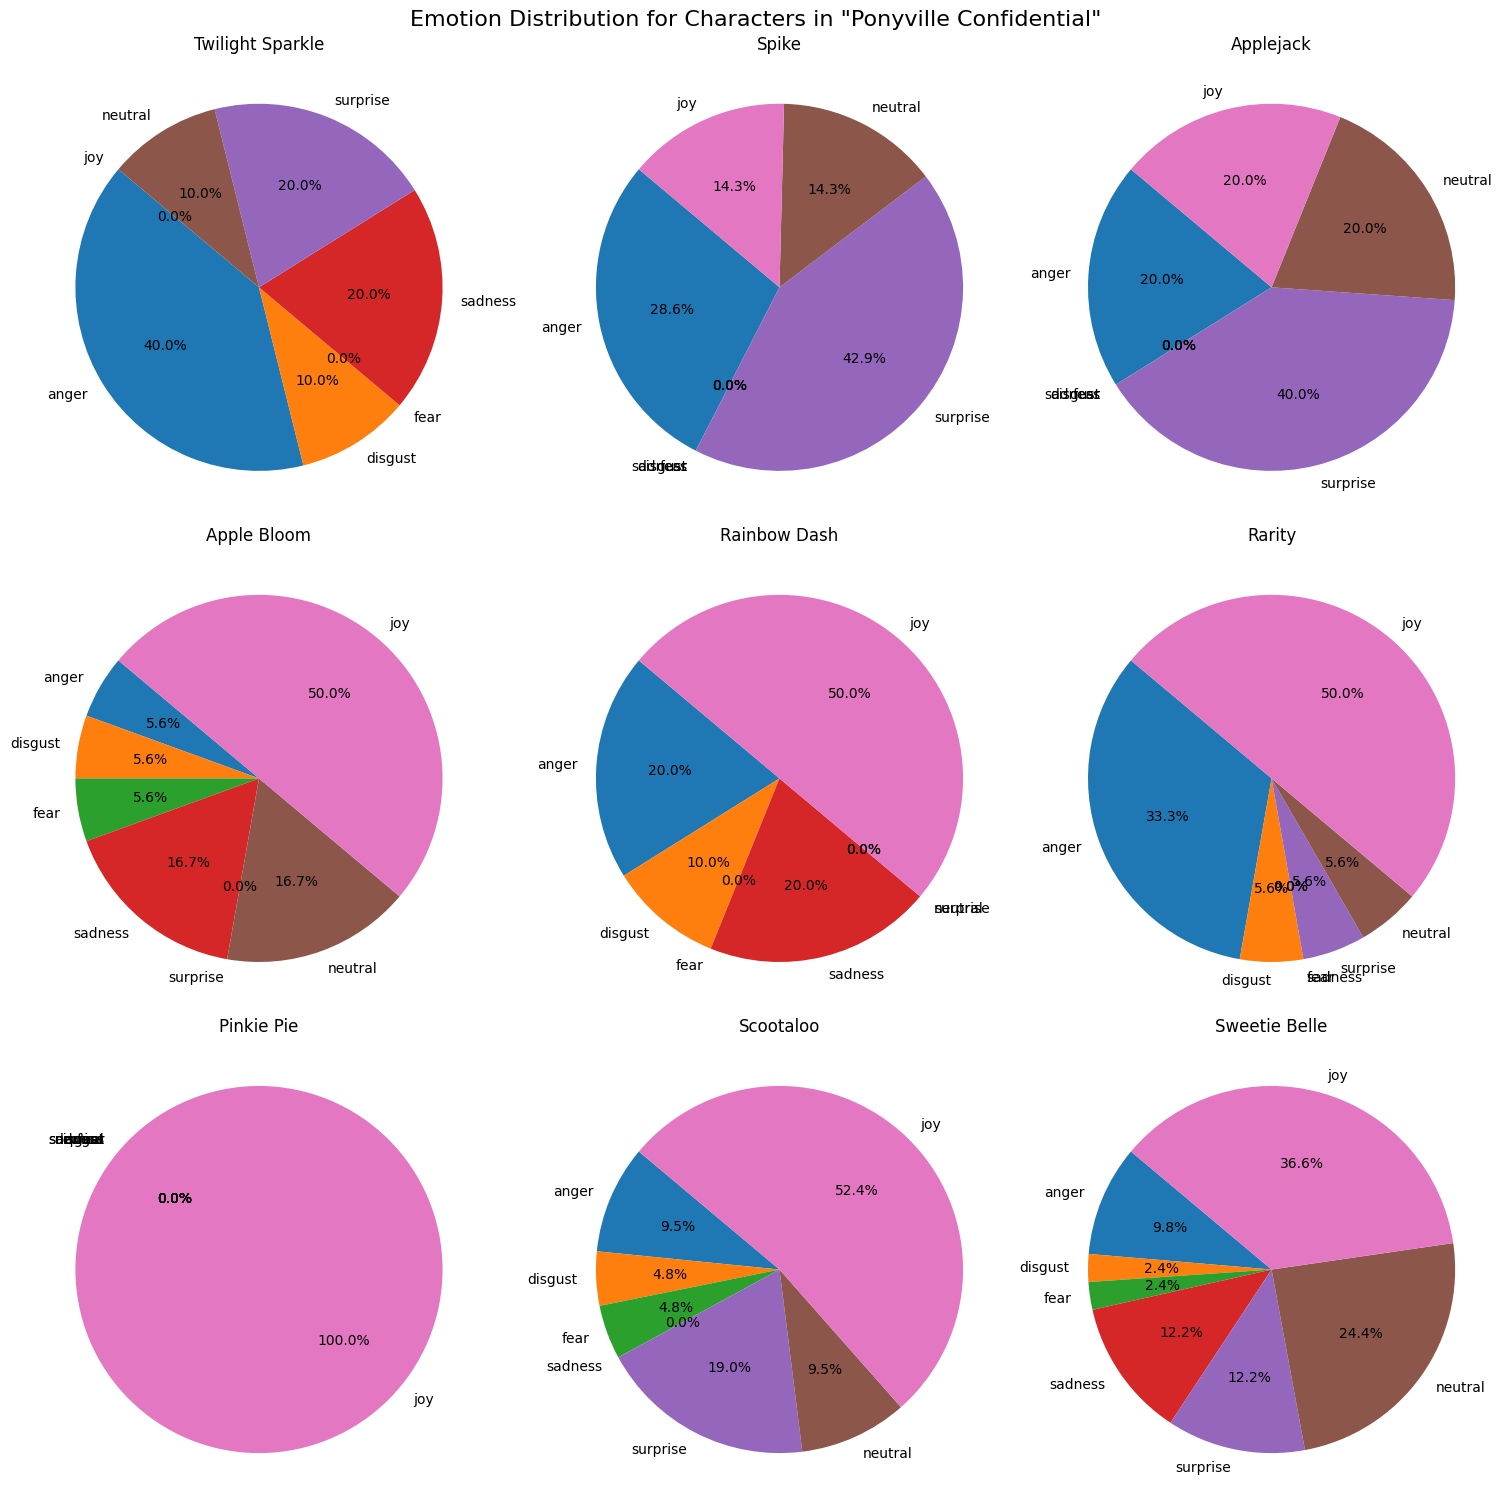

In [ ]:
import matplotlib.pyplot as plt
import math

# Assuming new_character_emotion_by_episode is defined and contains the nested 'characters' dictionary
# Specify the episode to plot
episode_to_plot = 'Ponyville Confidential'

# Check if the episode exists in the data
if episode_to_plot in new_character_emotion_by_episode:
    episode_data = new_character_emotion_by_episode[episode_to_plot]['characters']
    emotions_to_plot = ['anger', 'disgust', 'fear', 'sadness', 'surprise', 'neutral', 'joy']

    # Filter characters with at least one non-zero emotion entry
    filtered_characters = {char: emotions for char, emotions in episode_data.items()
                           if any(emotions[emotion] > 0 for emotion in emotions_to_plot)}

    # Determine the layout of the subplots
    num_characters = len(filtered_characters)
    num_cols = 3  # Define the number of columns for the subplot grid
    num_rows = math.ceil(num_characters / num_cols)  # Calculate the number of rows needed

    # Create subplots with multiple lines
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), constrained_layout=True)

    # Flatten the axes array for easy iteration and hide extra subplots if any
    axs = axs.flatten()
    for ax in axs[num_characters:]:
        ax.set_visible(False)

    # Plot emotion data for each character
    for ax, (character, data) in zip(axs, filtered_characters.items()):
        emotion_values = [data.get(emotion, 0) for emotion in emotions_to_plot]
        ax.pie(emotion_values, labels=emotions_to_plot, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'{character}')

    # Set a main title for the entire figure
    fig.suptitle(f'Emotion Distribution for Characters in "{episode_to_plot}"', fontsize=16)

    # Show the figure with all subplots
    plt.show()
else:
    print(f"No data available for the episode '{episode_to_plot}'.")


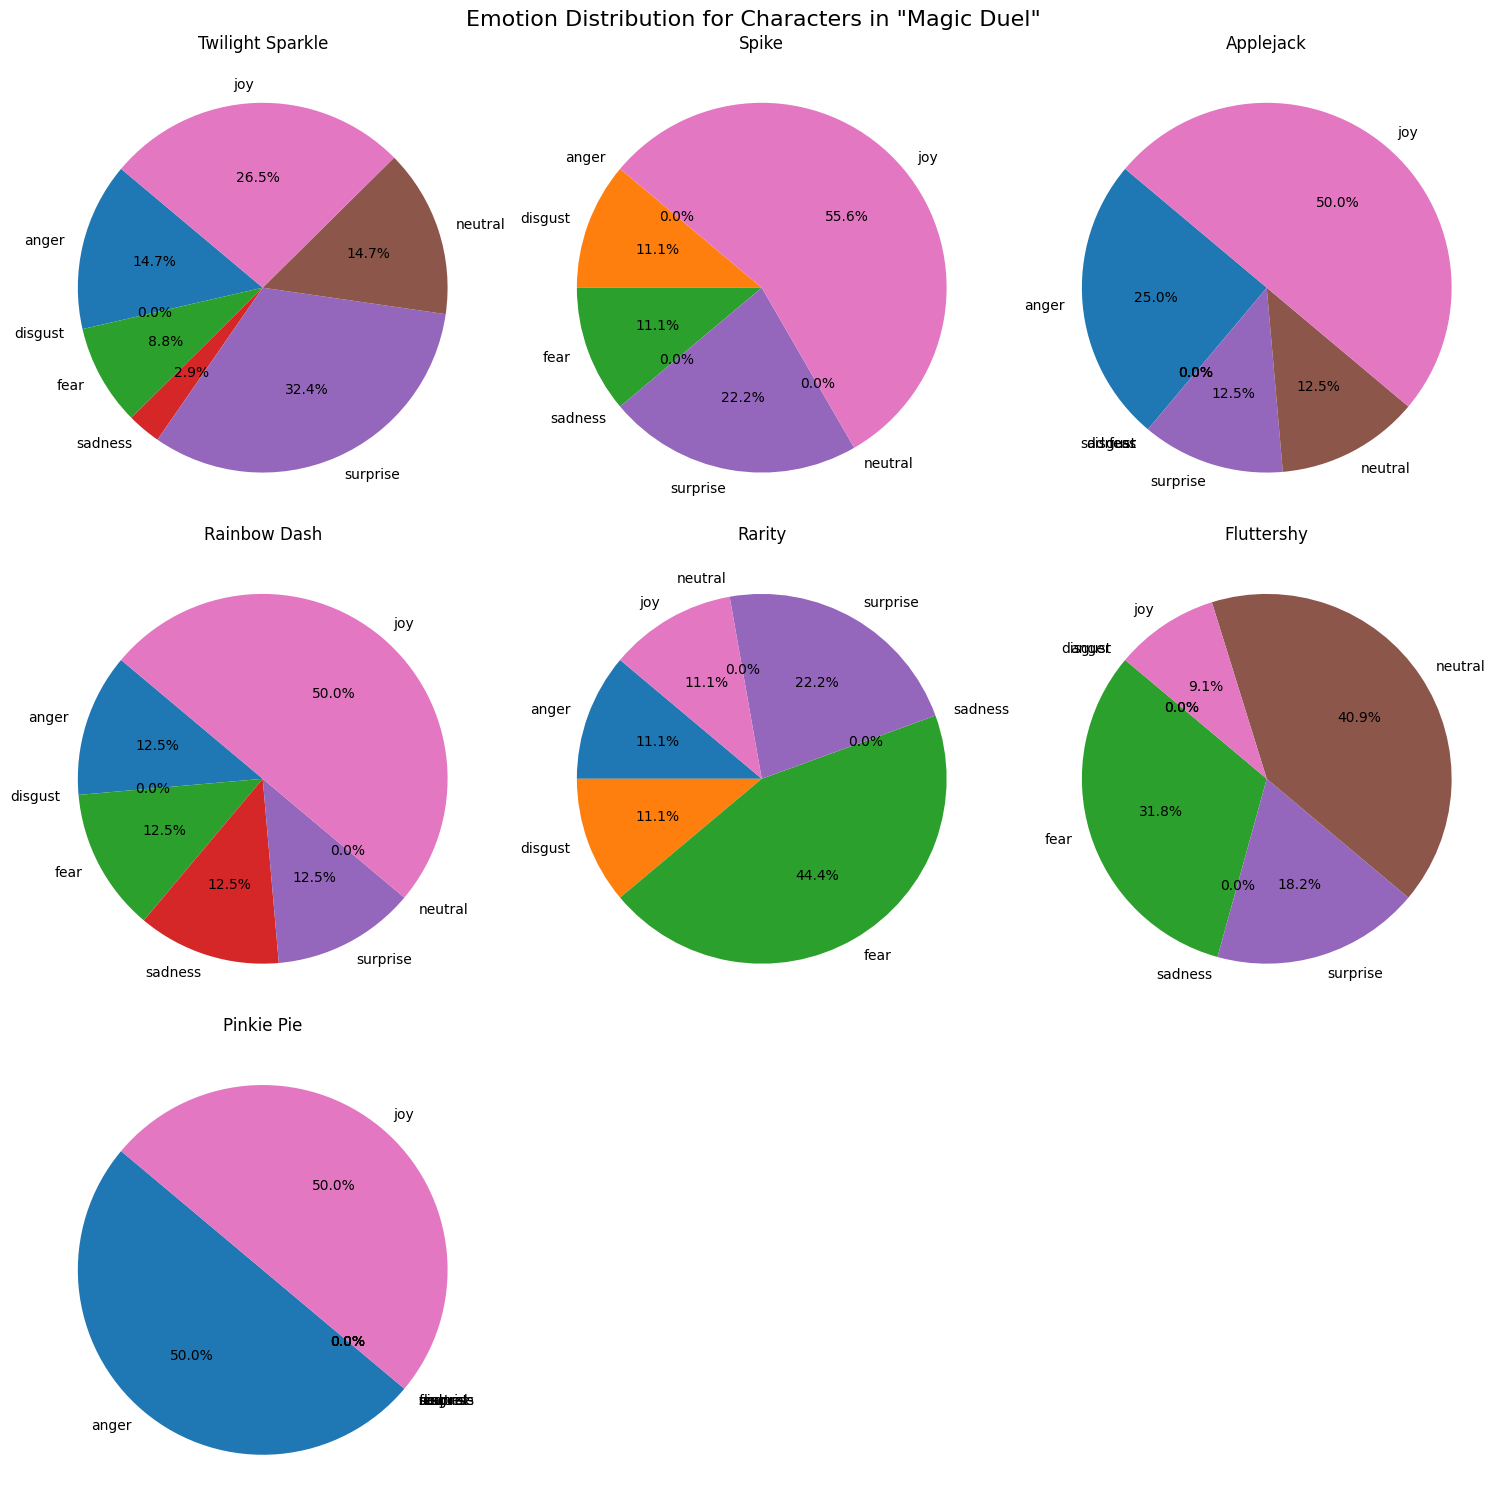

In [ ]:
import matplotlib.pyplot as plt
import math

# Assuming new_character_emotion_by_episode is defined and contains the nested 'characters' dictionary
# Specify the episode to plot
episode_to_plot = 'Magic Duel'

# Check if the episode exists in the data
if episode_to_plot in new_character_emotion_by_episode:
    episode_data = new_character_emotion_by_episode[episode_to_plot]['characters']
    emotions_to_plot = ['anger', 'disgust', 'fear', 'sadness', 'surprise', 'neutral', 'joy']

    # Filter characters with at least one non-zero emotion entry
    filtered_characters = {char: emotions for char, emotions in episode_data.items()
                           if any(emotions[emotion] > 0 for emotion in emotions_to_plot)}

    # Determine the layout of the subplots
    num_characters = len(filtered_characters)
    num_cols = 3  # Define the number of columns for the subplot grid
    num_rows = math.ceil(num_characters / num_cols)  # Calculate the number of rows needed

    # Create subplots with multiple lines
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), constrained_layout=True)

    # Flatten the axes array for easy iteration and hide extra subplots if any
    axs = axs.flatten()
    for ax in axs[num_characters:]:
        ax.set_visible(False)

    # Plot emotion data for each character
    for ax, (character, data) in zip(axs, filtered_characters.items()):
        emotion_values = [data.get(emotion, 0) for emotion in emotions_to_plot]
        ax.pie(emotion_values, labels=emotions_to_plot, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'{character}')

    # Set a main title for the entire figure
    fig.suptitle(f'Emotion Distribution for Characters in "{episode_to_plot}"', fontsize=16)

    # Show the figure with all subplots
    plt.show()
else:
    print(f"No data available for the episode '{episode_to_plot}'.")


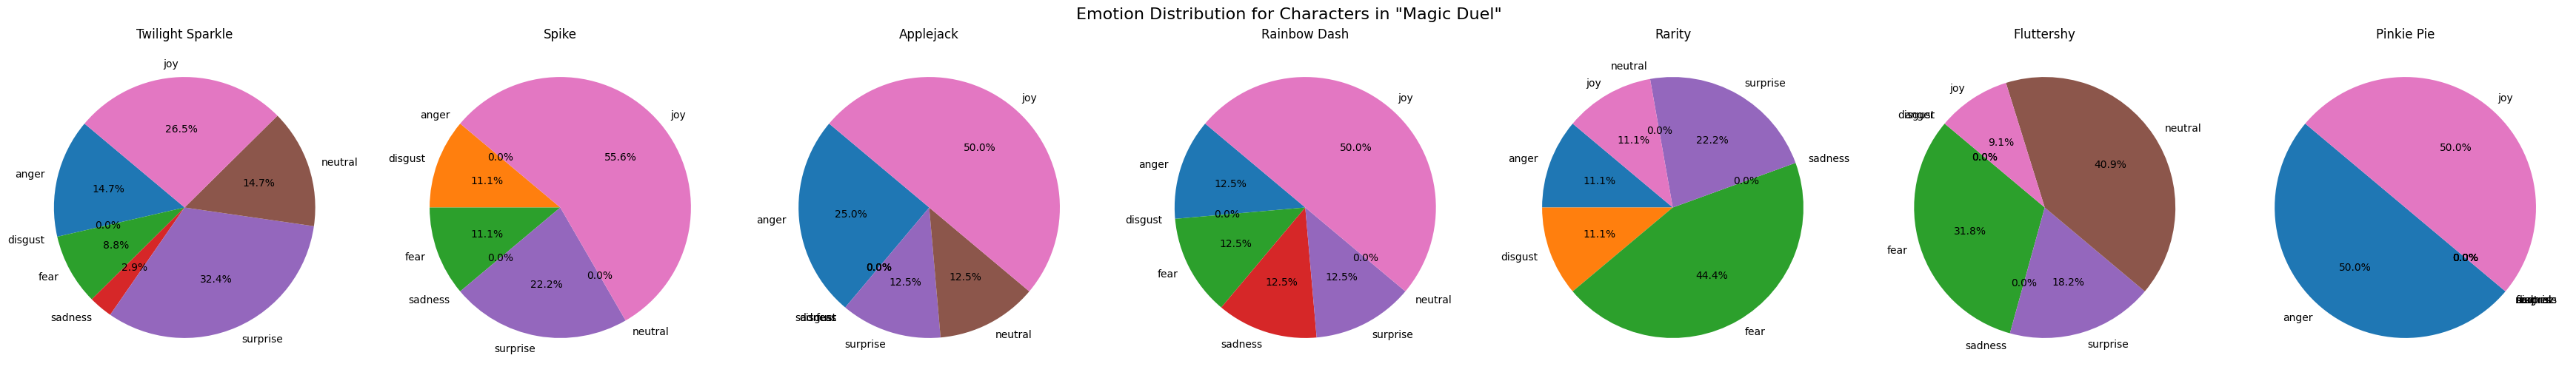

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming new_character_emotion_by_episode is defined and contains the nested 'characters' dictionary
# # Specify the episode to plot
# episode_to_plot = 'Magic Duel'

# # Check if the episode exists in the data
# if episode_to_plot in new_character_emotion_by_episode:
#     episode_data = new_character_emotion_by_episode[episode_to_plot]['characters']
#     emotions_to_plot = ['anger', 'disgust', 'fear', 'sadness', 'surprise', 'neutral', 'joy']

#     # Filter characters with at least one non-zero emotion entry
#     filtered_characters = {char: emotions for char, emotions in episode_data.items()
#                            if any(emotions[emotion] > 0 for emotion in emotions_to_plot)}

#     # Create subplots for each character
#     num_characters = len(filtered_characters)
#     fig, axs = plt.subplots(1, num_characters, figsize=(5 * num_characters, 5), constrained_layout=True)
#     if num_characters == 1:
#         axs = [axs]

#     # Plot emotion data for each character
#     for ax, (character, data) in zip(axs, filtered_characters.items()):
#         emotion_values = [data.get(emotion, 0) for emotion in emotions_to_plot]
#         ax.pie(emotion_values, labels=emotions_to_plot, autopct='%1.1f%%', startangle=140)
#         ax.set_title(f'{character}')

#     # Set a main title for the entire figure
#     fig.suptitle(f'Emotion Distribution for Characters in "{episode_to_plot}"', fontsize=16)

#     # Show the figure with all subplots
#     plt.show()
# else:
#     print(f"No data available for the episode '{episode_to_plot}'.")


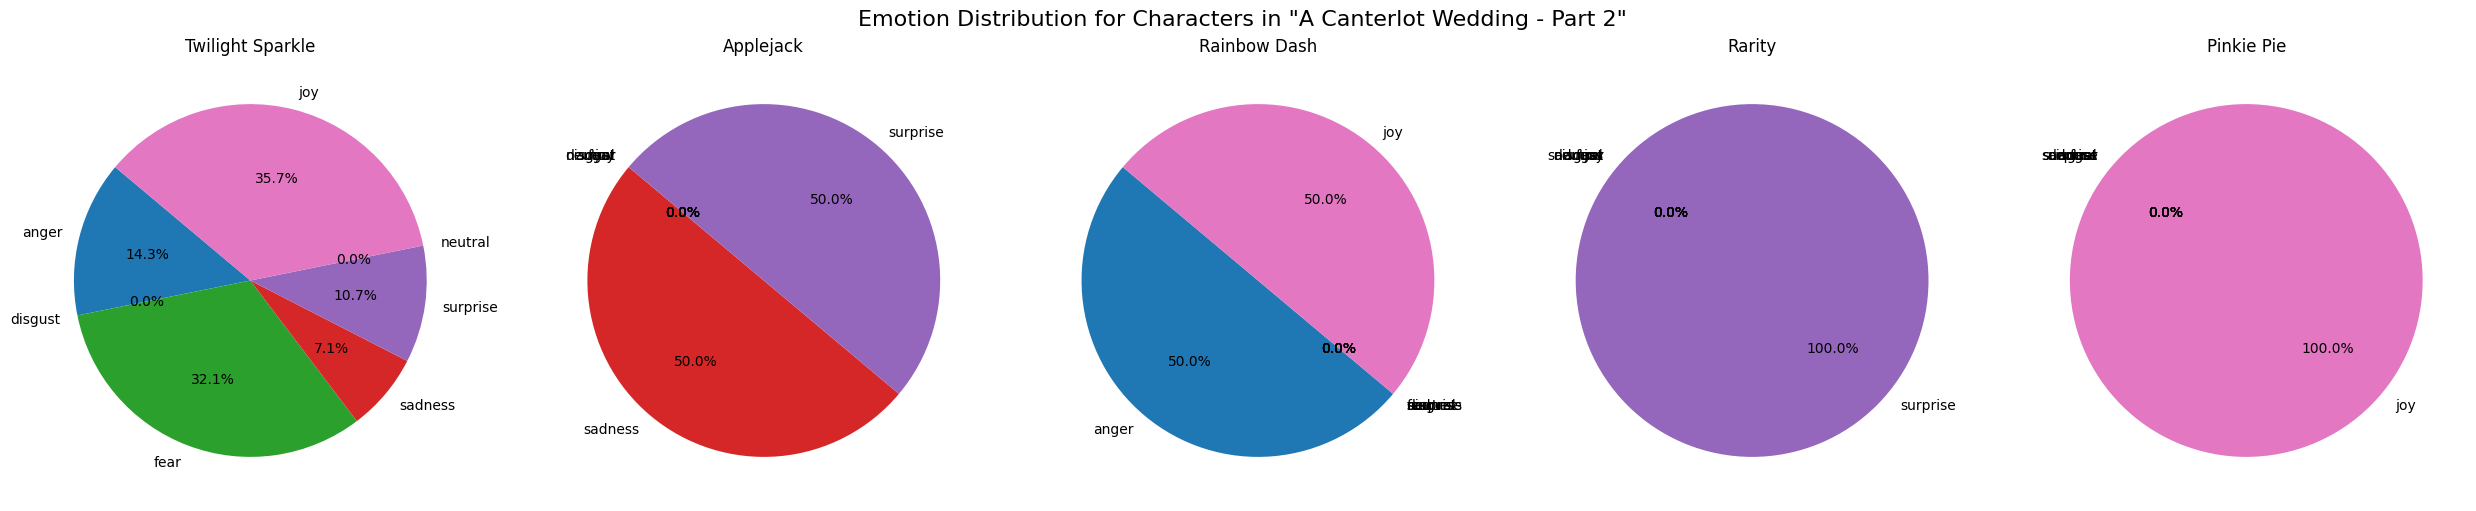

In [ ]:
import matplotlib.pyplot as plt

# Assuming new_character_emotion_by_episode is defined and contains the nested 'characters' dictionary
# Specify the episode to plot
episode_to_plot = 'A Canterlot Wedding - Part 2'

# Check if the episode exists in the data
if episode_to_plot in new_character_emotion_by_episode:
    episode_data = new_character_emotion_by_episode[episode_to_plot]['characters']
    emotions_to_plot = ['anger', 'disgust', 'fear', 'sadness', 'surprise', 'neutral', 'joy']

    # Filter characters with at least one non-zero emotion entry
    filtered_characters = {char: emotions for char, emotions in episode_data.items()
                           if any(emotions[emotion] > 0 for emotion in emotions_to_plot)}

    # Create subplots for each character
    num_characters = len(filtered_characters)
    fig, axs = plt.subplots(1, num_characters, figsize=(5 * num_characters, 5), constrained_layout=True)
    if num_characters == 1:
        axs = [axs]

    # Plot emotion data for each character
    for ax, (character, data) in zip(axs, filtered_characters.items()):
        emotion_values = [data.get(emotion, 0) for emotion in emotions_to_plot]
        ax.pie(emotion_values, labels=emotions_to_plot, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'{character}')

    # Set a main title for the entire figure
    fig.suptitle(f'Emotion Distribution for Characters in "{episode_to_plot}"', fontsize=16)

    # Show the figure with all subplots
    plt.show()
else:
    print(f"No data available for the episode '{episode_to_plot}'.")

<ipython-input-60-e33e2689a3da>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['emotion_negativity'] = filtered_df['emotion_chatgpt'].map(emotion_negativity_order)


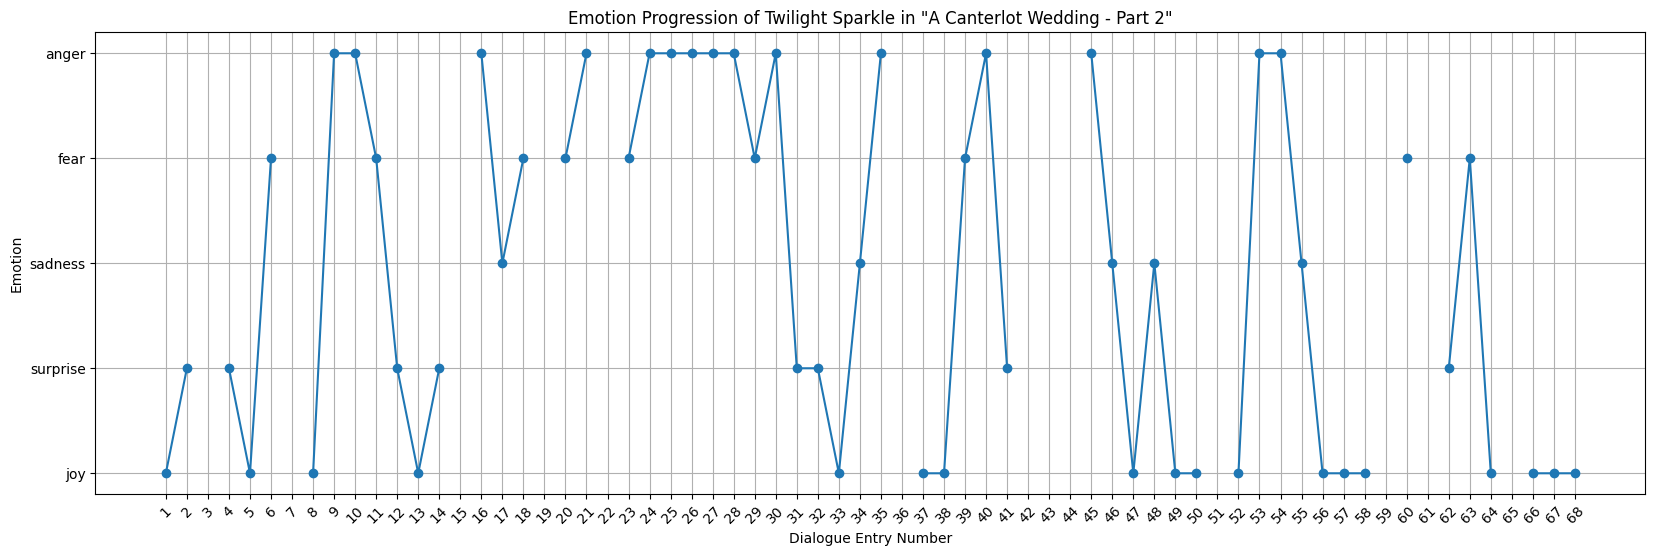

In [ ]:
# Assuming we have the following emotions and their respective negativity rankings:
emotion_negativity_order = {
    'anger': 5,  # most negative
    'fear': 4,
    'sadness': 3,
    'surprise': 2,
    'joy': 1      # least negative
}

filtered_df = df[(df['title'] == 'The Return of Harmony Part 2') & (df['pony'] == 'Twilight Sparkle')]

# Apply the negativity ranking to the emotion values
filtered_df['emotion_negativity'] = filtered_df['emotion_chatgpt'].map(emotion_negativity_order)

# Create the plot with ordered emotions
plt.figure(figsize=(20, 6))

plt.plot(range(len(filtered_df)), filtered_df['emotion_negativity'], marker='o')
plt.xticks(ticks=np.arange(0, len(filtered_df), step=1), labels=np.arange(1, len(filtered_df) + 1), rotation=45)
plt.yticks(np.arange(1, 6), [emotion for emotion, negativity in sorted(emotion_negativity_order.items(), key=lambda item: item[1])])
plt.xlabel('Dialogue Entry Number')
plt.ylabel('Emotion')
plt.title('Emotion Progression of Twilight Sparkle in "A Canterlot Wedding - Part 2"')
plt.grid(True)
plt.show()

<ipython-input-61-6089658a01f8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['emotion_negativity'] = filtered_df['emotion_chatgpt'].map(emotion_negativity_order)
<ipython-input-61-6089658a01f8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['emotion_negativity'] = filtered_df['emotion_chatgpt'].map(emotion_negativity_order)
<ipython-input-61-6089658a01f8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

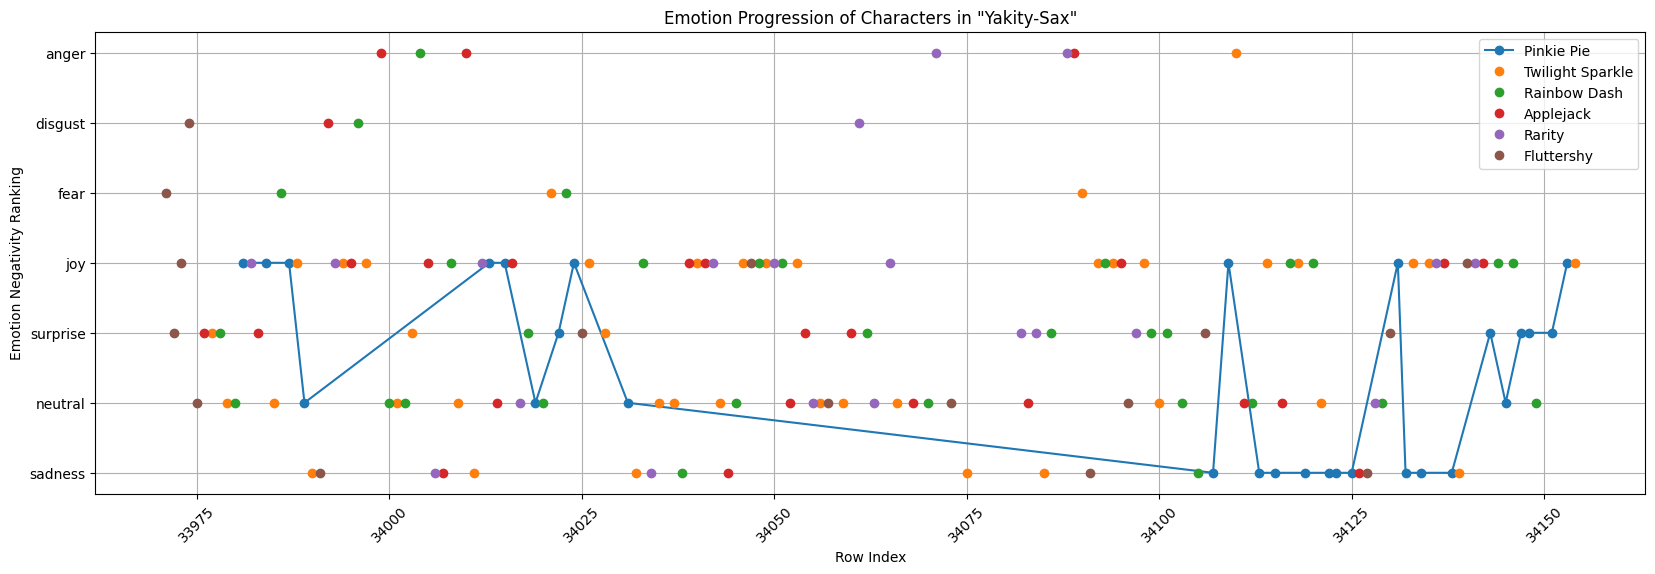

In [ ]:
# Update the emotion_negativity_order with all emotions included and ranked by negativeness
emotion_negativity_order = {
    'anger': 7,     # most negative
    'disgust': 6,
    'fear': 5,
    'joy': 4,
    'surprise': 3,
    'neutral': 2,
    'sadness': 1        # least negative
}

# List of characters to plot
characters = ['Pinkie Pie', 'Twilight Sparkle', 'Rainbow Dash', 'Applejack', 'Rarity', 'Fluttershy']

# Create the plot
plt.figure(figsize=(20, 6))

# Loop through each character and plot their emotions
for character in characters:
    filtered_df = df[(df['title'] == 'Yakity-Sax') & (df['pony'] == character)]
    filtered_df['emotion_negativity'] = filtered_df['emotion_chatgpt'].map(emotion_negativity_order)

    if character == 'Pinkie Pie':
        plt.plot(filtered_df.index, filtered_df['emotion_negativity'], marker='o', linestyle='-', label=character)
    else:
        plt.plot(filtered_df.index, filtered_df['emotion_negativity'], marker='o', linestyle='none', label=character)

# Set the plot details
plt.xticks(rotation=45)
plt.yticks(np.arange(1, 8), [emotion for emotion, negativity in sorted(emotion_negativity_order.items(), key=lambda item: item[1])])
plt.xlabel('Row Index')
plt.ylabel('Emotion Negativity Ranking')
plt.title('Emotion Progression of Characters in "Yakity-Sax"')
plt.grid(True)
plt.legend()
plt.show()


##### 2. Interaction-Based Emotional Dynamics (looking at each episode, see the correlation of emotions between the characters)

In [ ]:
episode_data = new_character_emotion_by_episode['Yakity-Sax']['characters']

In [ ]:
# Convert the episode data to a DataFrame
df_episode = pd.DataFrame.from_dict(episode_data, orient='index')

# Exclude 'joy' and 'neutral' from the DataFrame
df_episode.drop(['neutral'], axis=1, inplace=True)

# Calculate pairwise correlations between characters
character_correlations = {}

character_pairs = combinations(df_episode.index, 2)
for pair in character_pairs:
    char1, char2 = pair
    correlation = df_episode.loc[[char1, char2]].T.corr().iloc[0, 1]
    character_correlations[pair] = correlation

# Output the correlations
character_correlations


{('Twilight Sparkle', 'Spike'): 0.6322300442855736,
 ('Twilight Sparkle', 'Applejack'): 0.8766049104343051,
 ('Twilight Sparkle', 'Apple Bloom'): nan,
 ('Twilight Sparkle', 'Rainbow Dash'): 0.8363265481638378,
 ('Twilight Sparkle', 'Rarity'): 0.9191822020705196,
 ('Twilight Sparkle', 'Fluttershy'): 0.5232248642363369,
 ('Twilight Sparkle', 'Pinkie Pie'): 0.7704690371187275,
 ('Twilight Sparkle', 'Scootaloo'): nan,
 ('Twilight Sparkle', 'Sweetie Belle'): nan,
 ('Twilight Sparkle', 'Discord'): nan,
 ('Twilight Sparkle', 'Starlight Glimmer'): nan,
 ('Spike', 'Applejack'): 0.7875097928405352,
 ('Spike', 'Apple Bloom'): nan,
 ('Spike', 'Rainbow Dash'): 0.9472044455566301,
 ('Spike', 'Rarity'): 0.7824884252135749,
 ('Spike', 'Fluttershy'): 0.75,
 ('Spike', 'Pinkie Pie'): 0.49543369430686246,
 ('Spike', 'Scootaloo'): nan,
 ('Spike', 'Sweetie Belle'): nan,
 ('Spike', 'Discord'): nan,
 ('Spike', 'Starlight Glimmer'): nan,
 ('Applejack', 'Apple Bloom'): nan,
 ('Applejack', 'Rainbow Dash'): 0.866

##### 3. Macro level episode emotional plot pattern

In [ ]:
df_3 = df[~df['title'].str.contains('part', na=False)]

In [ ]:
title_counts = df_3['title'].value_counts()

# Filter titles with counts greater than 100
titles_with_counts_over_100 = title_counts[title_counts > 100].index

# Filter the DataFrame to only include rows with those titles
filtered_df = df_3[df_3['title'].isin(titles_with_counts_over_100)]

In [ ]:
# Function to split the episode data into three parts and calculate emotion distribution
def split_and_get_emotion_dist(episode_data):
    # Determine the size of each part (start, middle, end)
    part_size = len(episode_data) // 3
    # Create the parts
    start = episode_data.iloc[:part_size]
    middle = episode_data.iloc[part_size:2 * part_size]
    end = episode_data.iloc[2 * part_size:]

    # Return the emotion distribution for each part
    return {
        'start': start['emotion_chatgpt'].value_counts(normalize=True),
        'middle': middle['emotion_chatgpt'].value_counts(normalize=True),
        'end': end['emotion_chatgpt'].value_counts(normalize=True)
    }

# Group data by episode
grouped = filtered_df.groupby('title')

# Initialize dictionaries to hold the sum of emotion distributions for each part
sum_dists = {'start': pd.Series(), 'middle': pd.Series(), 'end': pd.Series()}
episode_count = 0

# Iterate over each episode
for name, group in grouped:
    episode_count += 1
    dists = split_and_get_emotion_dist(group)

    # Sum up the distributions for each part
    for part in ['start', 'middle', 'end']:
        sum_dists[part] = sum_dists[part].add(dists[part], fill_value=0)

# Calculate the average distribution for each part over all episodes
avg_dists = {part: sum_dists[part] / episode_count for part in ['start', 'middle', 'end']}

# Print the average distributions over all episodes for each part
print("\nAverage distributions over all episodes:")
for part in ['start', 'middle', 'end']:
    print(f"\n{part.capitalize()} part:")
    print(avg_dists[part])

<ipython-input-66-be3ae823a7b4>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sum_dists = {'start': pd.Series(), 'middle': pd.Series(), 'end': pd.Series()}
<ipython-input-66-be3ae823a7b4>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sum_dists = {'start': pd.Series(), 'middle': pd.Series(), 'end': pd.Series()}
<ipython-input-66-be3ae823a7b4>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sum_dists = {'start': pd.Series(), 'middle': pd.Series(), 'end': pd.Series()}



Average distributions over all episodes:

Start part:
anger       0.054644
disgust     0.025149
fear        0.061458
joy         0.444535
neutral     0.202336
sadness     0.035085
surprise    0.176794
dtype: float64

Middle part:
anger       0.082455
disgust     0.026653
fear        0.084332
joy         0.369917
neutral     0.206496
sadness     0.047500
surprise    0.182647
dtype: float64

End part:
anger       0.093242
disgust     0.021375
fear        0.084389
joy         0.375813
neutral     0.165700
sadness     0.077859
surprise    0.181621
dtype: float64


In [ ]:
sum_of_squared_diffs = {'start': pd.Series(), 'middle': pd.Series(), 'end': pd.Series()}

# Iterate over each episode again
for name, group in grouped:
    dists = split_and_get_emotion_dist(group)

    # Accumulate squared differences from the mean for each part
    for part in ['start', 'middle', 'end']:
        squared_diffs = (dists[part] - avg_dists[part]).pow(2)
        sum_of_squared_diffs[part] = sum_of_squared_diffs[part].add(squared_diffs, fill_value=0)

# Calculate the variance distribution for each part over all episodes
var_dists = {part: sum_of_squared_diffs[part] / (episode_count - 1) for part in ['start', 'middle', 'end']}

# Print the variance distributions over all episodes for each part
print("\nVariance distributions over all episodes:")
for part in ['start', 'middle', 'end']:
    print(f"\n{part.capitalize()} part:")
    print(var_dists[part])

<ipython-input-67-2663c3c7dd70>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sum_of_squared_diffs = {'start': pd.Series(), 'middle': pd.Series(), 'end': pd.Series()}
<ipython-input-67-2663c3c7dd70>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sum_of_squared_diffs = {'start': pd.Series(), 'middle': pd.Series(), 'end': pd.Series()}
<ipython-input-67-2663c3c7dd70>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sum_of_squared_diffs = {'start': pd.Series(), 'middle': pd.Series(), 'end': pd.Series()}



Variance distributions over all episodes:

Start part:
anger       0.002260
disgust     0.000561
fear        0.002486
joy         0.017840
neutral     0.006100
sadness     0.000714
surprise    0.005434
dtype: float64

Middle part:
anger       0.004274
disgust     0.000443
fear        0.003714
joy         0.013695
neutral     0.007693
sadness     0.001415
surprise    0.006258
dtype: float64

End part:
anger       0.004308
disgust     0.000484
fear        0.003251
joy         0.011810
neutral     0.004753
sadness     0.002383
surprise    0.004283
dtype: float64


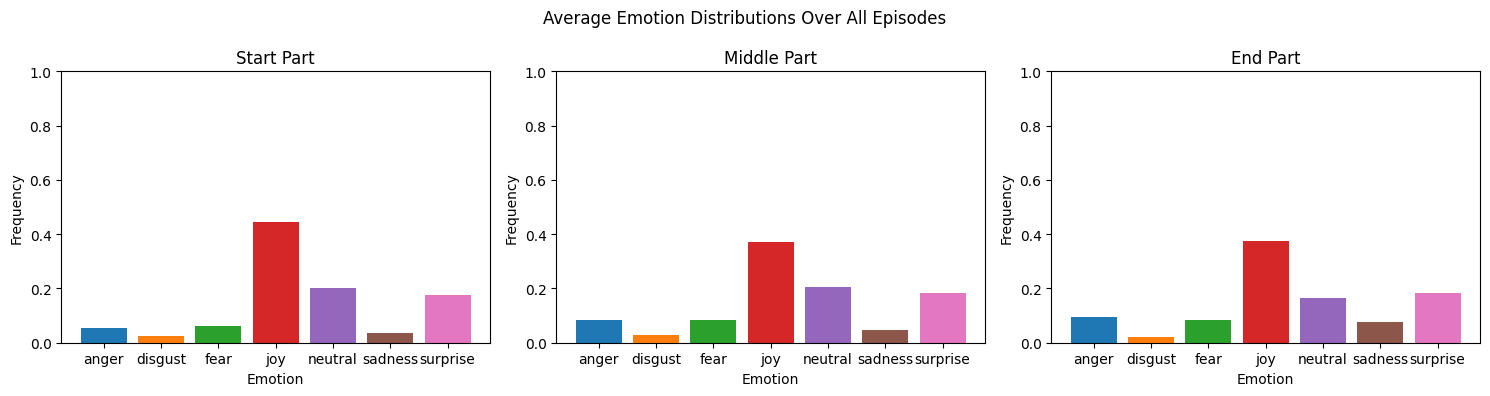

In [ ]:
# Function to create a comprehensive list of all unique emotions
def get_all_emotions(emotion_dists):
    all_emotions = set()
    for dist in emotion_dists.values():
        all_emotions.update(dist.index)
    return sorted(all_emotions)

# Function to ensure all emotions are present in each part, with zero for missing emotions
def standardize_emotion_dists(emotion_dists, all_emotions):
    standardized_dists = {}
    for part, dist in emotion_dists.items():
        standardized_dist = dist.reindex(all_emotions, fill_value=0)
        standardized_dists[part] = standardized_dist
    return standardized_dists

# Function to create a consistent color map for emotions
def create_emotion_color_map(all_emotions):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    color_map = {emotion: colors[i % len(colors)] for i, emotion in enumerate(all_emotions)}
    return color_map

# Function to plot all emotion distributions in one figure
def plot_all_emotion_distributions(emotion_dists, title):
    all_emotions = get_all_emotions(emotion_dists)
    standardized_dists = standardize_emotion_dists(emotion_dists, all_emotions)
    color_map = create_emotion_color_map(all_emotions)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for i, part in enumerate(['start', 'middle', 'end']):
        sorted_emotions = standardized_dists[part]
        colors = [color_map[emotion] for emotion in sorted_emotions.index]
        axes[i].bar(sorted_emotions.index, sorted_emotions.values, color=colors)
        axes[i].set_title(f"{part.capitalize()} Part")
        axes[i].set_xlabel('Emotion')
        axes[i].set_ylabel('Frequency')
        axes[i].set_ylim(0, 1)  # Assuming the values are normalized

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plotting the average emotion distributions over all episodes
plot_all_emotion_distributions(avg_dists, "Average Emotion Distributions Over All Episodes")


In [ ]:
# Group data by episode
grouped = filtered_df.groupby('title')

# Initialize a dictionary to hold the emotion distributions for 'Yakity-Sax'
yakity_sax_dists = None

# Iterate over each episode
for name, group in grouped:
    if name == 'Yakity-Sax':
        yakity_sax_dists = split_and_get_emotion_dist(group)
        break  # Stop the loop as we found the needed episode

# Check if the episode was found and print its distributions
if yakity_sax_dists is not None:
    print("Distributions for the episode 'Yakity-Sax':")
    for part in ['start', 'middle', 'end']:
        print(f"\n{part.capitalize()} part:")
        print(yakity_sax_dists[part])
else:
    print("Episode 'Yakity-Sax' not found in the dataset.")


Distributions for the episode 'Yakity-Sax':

Start part:
joy         0.333333
neutral     0.240741
surprise    0.148148
sadness     0.092593
fear        0.074074
disgust     0.055556
anger       0.055556
Name: emotion_chatgpt, dtype: float64

Middle part:
neutral     0.333333
joy         0.277778
surprise    0.166667
sadness     0.129630
anger       0.055556
disgust     0.018519
fear        0.018519
Name: emotion_chatgpt, dtype: float64

End part:
joy         0.375000
sadness     0.250000
neutral     0.196429
surprise    0.160714
anger       0.017857
Name: emotion_chatgpt, dtype: float64


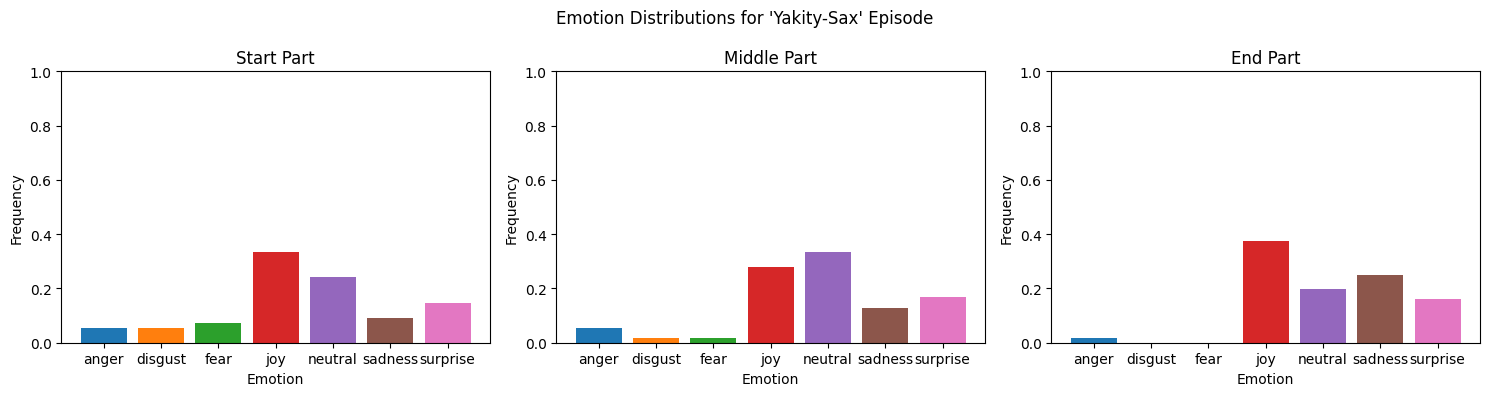

In [ ]:
# Function to create a comprehensive list of all unique emotions
def get_all_emotions(emotion_dists):
    all_emotions = set()
    for dist in emotion_dists.values():
        all_emotions.update(dist.index)
    return sorted(all_emotions)

# Function to ensure all emotions are present in each part, with zero for missing emotions
def standardize_emotion_dists(emotion_dists, all_emotions):
    standardized_dists = {}
    for part, dist in emotion_dists.items():
        standardized_dist = dist.reindex(all_emotions, fill_value=0)
        standardized_dists[part] = standardized_dist
    return standardized_dists

# Function to create a consistent color map for emotions
def create_emotion_color_map(all_emotions):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    color_map = {emotion: colors[i % len(colors)] for i, emotion in enumerate(all_emotions)}
    return color_map

# Function to plot all emotion distributions in one figure
def plot_all_emotion_distributions(emotion_dists, title):
    all_emotions = get_all_emotions(emotion_dists)
    standardized_dists = standardize_emotion_dists(emotion_dists, all_emotions)
    color_map = create_emotion_color_map(all_emotions)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for i, part in enumerate(['start', 'middle', 'end']):
        sorted_emotions = standardized_dists[part]
        colors = [color_map[emotion] for emotion in sorted_emotions.index]
        axes[i].bar(sorted_emotions.index, sorted_emotions.values, color=colors)
        axes[i].set_title(f"{part.capitalize()} Part")
        axes[i].set_xlabel('Emotion')
        axes[i].set_ylabel('Frequency')
        axes[i].set_ylim(0, 1)  # Assuming the values are normalized

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Example usage with yakity_sax_dists
# Plotting the emotion distributions for 'Yakity-Sax' episode
plot_all_emotion_distributions(yakity_sax_dists, "Emotion Distributions for 'Yakity-Sax' Episode")

In [ ]:
# List of emotions to sum up
sum_emotions = ['anger', 'disgust', 'fear', 'sadness']

# Function to sum specific emotions and get joy value
def process_emotions(emotion_dist):
    sum_of_specific_emotions = emotion_dist[sum_emotions].sum() if sum_emotions[0] in emotion_dist else 0
    joy_value = emotion_dist['joy'] if 'joy' in emotion_dist else 0
    return sum_of_specific_emotions, joy_value

# Process emotions in the average distributions
processed_dists = {part: process_emotions(avg_dists[part]) for part in ['start', 'middle', 'end']}

# Print the processed distributions over all episodes for each part
print("\nProcessed distributions over all episodes:")
for part in ['start', 'middle', 'end']:
    sum_of_emotions, joy_value = processed_dists[part]
    print(f"\n{part.capitalize()} part:")
    print(f"Sum of {', '.join(sum_emotions)}: {sum_of_emotions}")
    print(f"Joy: {joy_value}")



Processed distributions over all episodes:

Start part:
Sum of anger, disgust, fear, sadness: 0.17633567316152848
Joy: 0.4445350093579391

Middle part:
Sum of anger, disgust, fear, sadness: 0.24093936465282212
Joy: 0.3699168520431313

End part:
Sum of anger, disgust, fear, sadness: 0.2768654318312166
Joy: 0.3758132029466411


In [ ]:
# Function to sum specific emotions, get joy value, and calculate variances
def process_emotions(emotion_dist, variance_dist):
    sum_of_specific_emotions = emotion_dist[sum_emotions].sum() if sum_emotions[0] in emotion_dist else 0
    joy_value = emotion_dist['joy'] if 'joy' in emotion_dist else 0

    variance_of_specific_emotions = variance_dist[sum_emotions].sum() if sum_emotions[0] in variance_dist else 0
    joy_variance = variance_dist['joy'] if 'joy' in variance_dist else 0

    return sum_of_specific_emotions, joy_value, variance_of_specific_emotions, joy_variance

# Process emotions in the average distributions and their variances
processed_dists = {part: process_emotions(avg_dists[part], var_dists[part]) for part in ['start', 'middle', 'end']}

# Print the processed distributions and variances over all episodes for each part
print("\nProcessed distributions and variances over all episodes:")
for part in ['start', 'middle', 'end']:
    sum_of_emotions, joy_value, variance_of_emotions, joy_variance = processed_dists[part]
    print(f"\n{part.capitalize()} part:")
    print(f"Sum of {', '.join(sum_emotions)}: {sum_of_emotions} (Variance: {variance_of_emotions})")
    print(f"Joy: {joy_value} (Variance: {joy_variance})")



Processed distributions and variances over all episodes:

Start part:
Sum of anger, disgust, fear, sadness: 0.17633567316152848 (Variance: 0.006021376109711833)
Joy: 0.4445350093579391 (Variance: 0.01783978032401822)

Middle part:
Sum of anger, disgust, fear, sadness: 0.24093936465282212 (Variance: 0.00984593604603988)
Joy: 0.3699168520431313 (Variance: 0.01369462476955219)

End part:
Sum of anger, disgust, fear, sadness: 0.2768654318312166 (Variance: 0.010426044106679237)
Joy: 0.3758132029466411 (Variance: 0.011809938139076395)


In [ ]:
def process_emotions(emotion_dist):
    # Initialize sum of specific emotions
    sum_of_specific_emotions = 0

    # Sum up the specified emotions if they are present in the distribution
    for emotion in sum_emotions:
        if emotion in emotion_dist:
            sum_of_specific_emotions += emotion_dist[emotion]

    # Get the joy value if present
    joy_value = emotion_dist['joy'] if 'joy' in emotion_dist else 0

    return sum_of_specific_emotions, joy_value

# Group data by episode
grouped = filtered_df.groupby('title')

# Initialize a dictionary to hold the emotion data for each episode
episode_emotion_data = {}

# Iterate over each episode
for name, group in grouped:
    dists = split_and_get_emotion_dist(group)

    # Process emotions for each part and create an array for the episode
    episode_data = []
    for part in ['start', 'middle', 'end']:
        negative, positive = process_emotions(dists[part])
        episode_data.extend([negative, positive])

    # Store the data in the dictionary
    episode_emotion_data[name] = episode_data

# Now 'episode_emotion_data' contains the emotion data for each episode


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

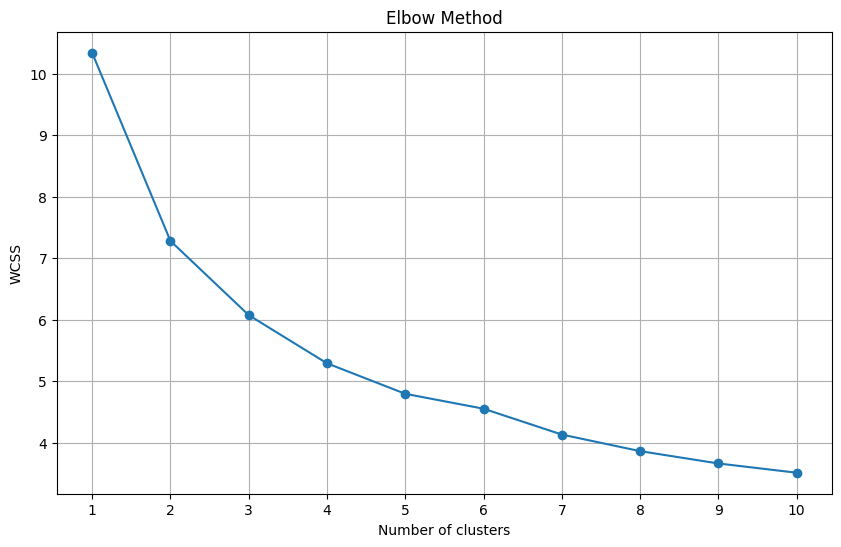

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Convert the emotion data into a NumPy array
data_for_clustering = np.array(list(episode_emotion_data.values()))

# Determine the range of cluster numbers to try
max_clusters = 10
wcss = []

# Calculate WCSS for each number of clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [ ]:
# Choose the number of clusters based on the elbow plot
optimal_clusters = 3  # Replace with your chosen number of clusters

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(data_for_clustering)

# Get the cluster labels
labels = kmeans.labels_

# Analyze and interpret the results
# for i, episode in enumerate(episode_emotion_data.keys()):
#     print(f"Episode: {episode}, Cluster: {labels[i]}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


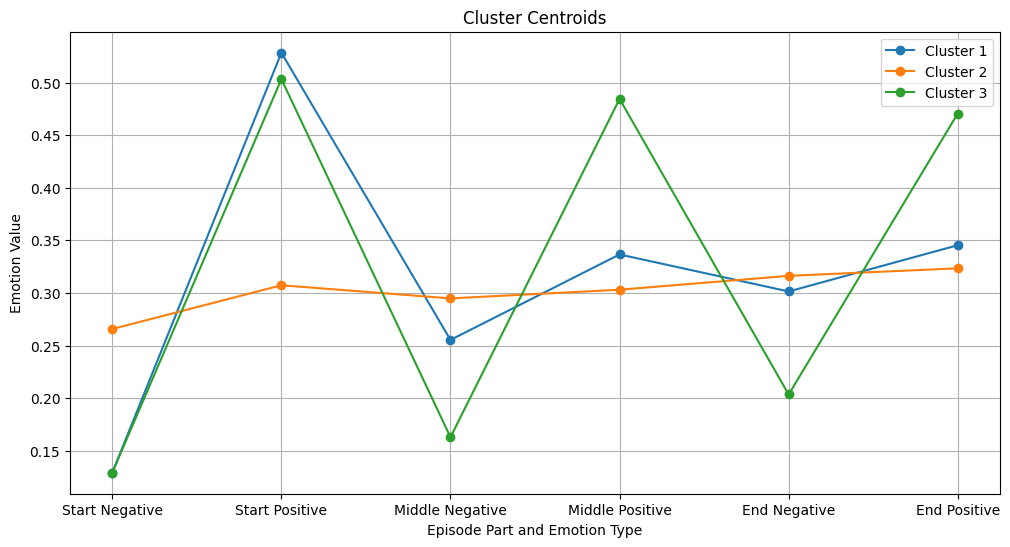

Cluster 1:
 - Start part: Negative=0.129, Positive=0.528
 - Middle part: Negative=0.255, Positive=0.337
 - End part: Negative=0.301, Positive=0.345
Cluster 2:
 - Start part: Negative=0.266, Positive=0.307
 - Middle part: Negative=0.295, Positive=0.303
 - End part: Negative=0.316, Positive=0.323
Cluster 3:
 - Start part: Negative=0.129, Positive=0.503
 - Middle part: Negative=0.163, Positive=0.484
 - End part: Negative=0.204, Positive=0.471


In [ ]:
# Retrieve the centroids for each cluster
centroids = kmeans.cluster_centers_

# Plot centroids
plt.figure(figsize=(12, 6))
for i, centroid in enumerate(centroids):
    plt.plot(centroid, marker='o', label=f'Cluster {i+1}')
plt.title('Cluster Centroids')
plt.xlabel('Episode Part and Emotion Type')
plt.ylabel('Emotion Value')
plt.xticks(range(6), ['Start Negative', 'Start Positive', 'Middle Negative', 'Middle Positive', 'End Negative', 'End Positive'])
plt.legend()
plt.grid(True)
plt.show()

# Describe each centroid
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}:")
    print(f" - Start part: Negative={centroid[0]:.3f}, Positive={centroid[1]:.3f}")
    print(f" - Middle part: Negative={centroid[2]:.3f}, Positive={centroid[3]:.3f}")
    print(f" - End part: Negative={centroid[4]:.3f}, Positive={centroid[5]:.3f}")


In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# Count the number of episodes in each cluster
cluster_sizes = {i: labels.tolist().count(i) for i in range(optimal_clusters)}

# Print the size of each cluster
for cluster_number, size in cluster_sizes.items():
    print(f"Cluster {cluster_number + 1} size: {size}")

# Calculate the distance of each episode from the centroid of its cluster
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data_for_clustering)

# Identify the episode with the smallest distance to its centroid in each cluster
example_episodes = {}
for cluster_number in range(optimal_clusters):
    episode_index = closest[cluster_number]
    episode_title = list(episode_emotion_data.keys())[episode_index]
    example_episodes[cluster_number] = episode_title

# Print the example episodes for each cluster
for cluster_number, episode_title in example_episodes.items():
    print(f"Example episode for Cluster {cluster_number + 1}: {episode_title}")


Cluster 1 size: 51
Cluster 2 size: 50
Cluster 3 size: 44
Example episode for Cluster 1: My Little Pony The Movie
Example episode for Cluster 2: Scare Master
Example episode for Cluster 3: On Your Marks


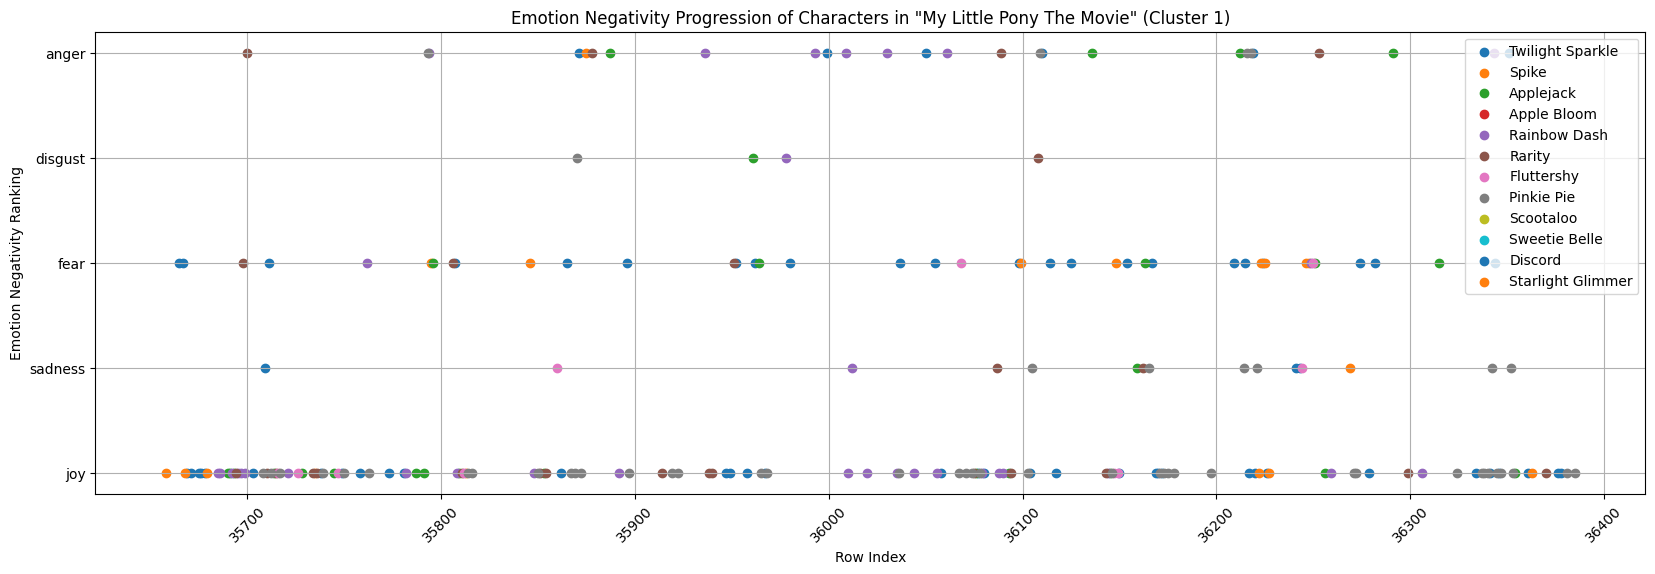

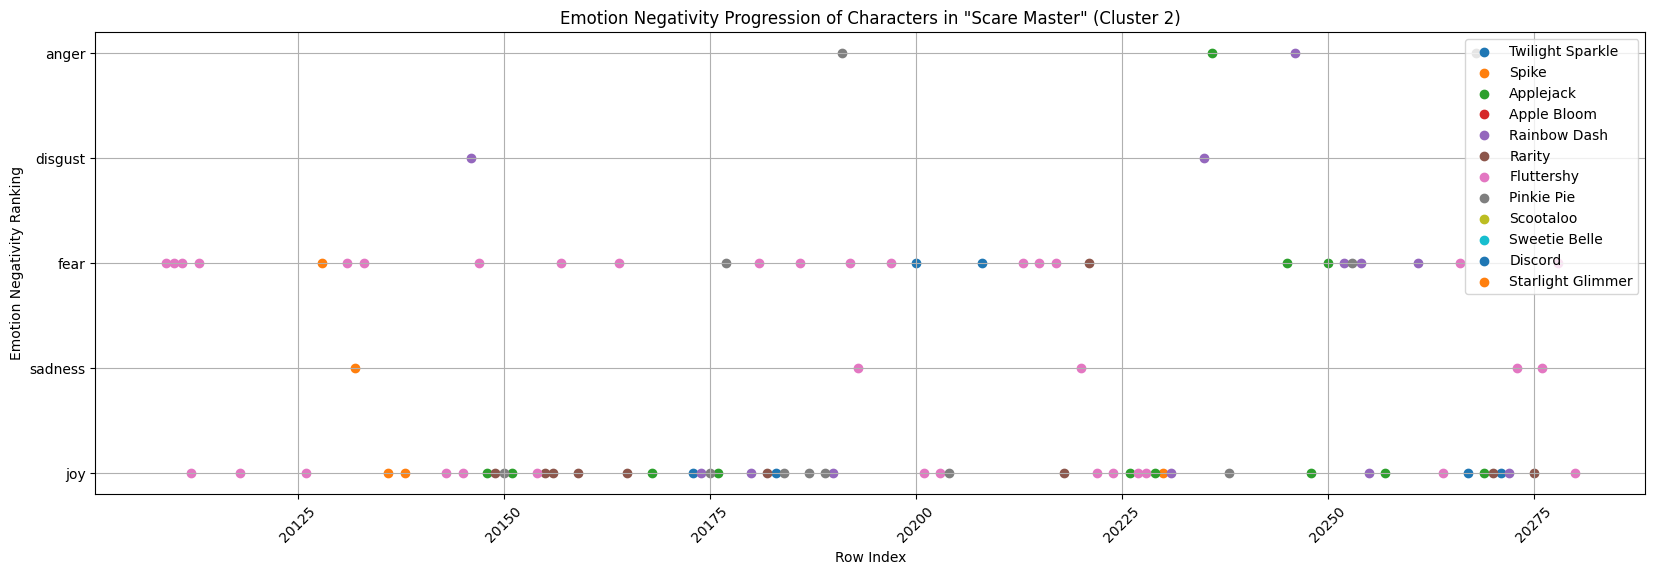

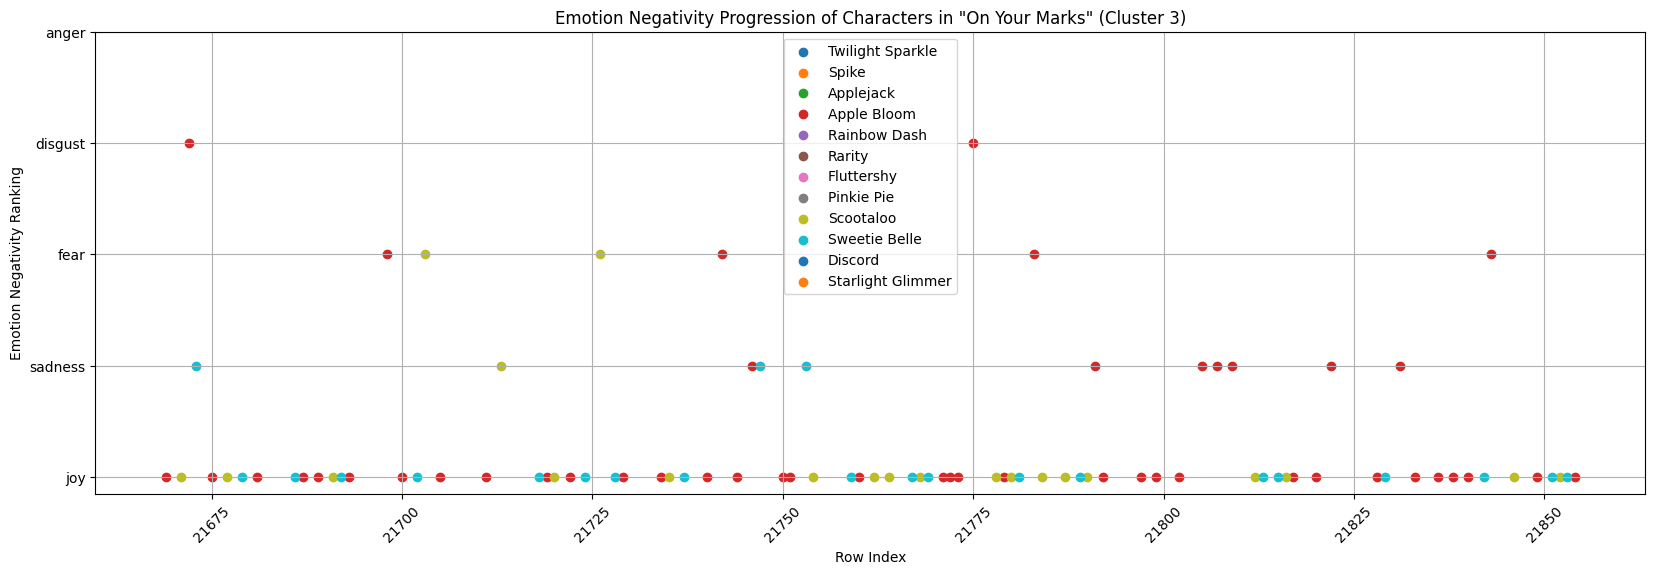

In [ ]:
# Updated emotion_negativity_order with unique keys
emotion_negativity_order = {
    'anger': 5,     # most negative
    'disgust': 4,
    'fear': 3,
    'sadness': 2,
    'joy': 1    # least negative, assuming you want to include neutral here
}

# List of characters to plot
characters = ['Twilight Sparkle',
 'Spike',
 'Applejack',
 'Apple Bloom',
 'Rainbow Dash',
 'Rarity',
 'Fluttershy',
 'Pinkie Pie',
 'Scootaloo',
 'Sweetie Belle',
 'Discord',
 'Starlight Glimmer']

# Loop through each example episode and plot their emotions
for cluster, episode_title in example_episodes.items():
    plt.figure(figsize=(20, 6))
    plt.title(f'Emotion Negativity Progression of Characters in "{episode_title}" (Cluster {cluster + 1})')

    for character in characters:
        # Filter the DataFrame for the current episode and character
        filtered_df = df[(df['title'] == episode_title) & (df['pony'] == character)].copy()
        # Use loc to avoid SettingWithCopyWarning
        filtered_df.loc[:, 'emotion_negativity'] = filtered_df['emotion_chatgpt'].map(emotion_negativity_order)

        # Plot the emotions for the character as points
        plt.scatter(filtered_df.index, filtered_df['emotion_negativity'], label=character)

    # Set the plot details
    plt.xticks(rotation=45)
    plt.yticks(np.arange(1, 6), [emotion for emotion, negativity in sorted(emotion_negativity_order.items(), key=lambda item: item[1], reverse=False)])
    plt.xlabel('Row Index')
    plt.ylabel('Emotion Negativity Ranking')
    plt.grid(True)
    plt.legend()
    plt.show()

Silhouette Score: 0.20451756126241483


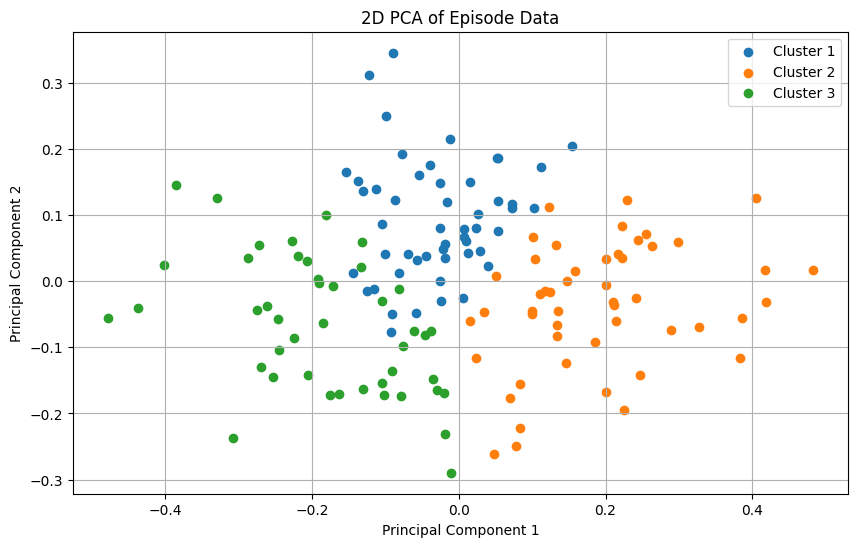

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Compute the silhouette score
silhouette_avg = silhouette_score(data_for_clustering, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Perform PCA to reduce to two dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_for_clustering)

# Plot the 2D data with clusters
plt.figure(figsize=(10, 6))
plt.title('2D PCA of Episode Data')
unique_labels = set(labels)
for label in unique_labels:
    cluster_points = principal_components[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


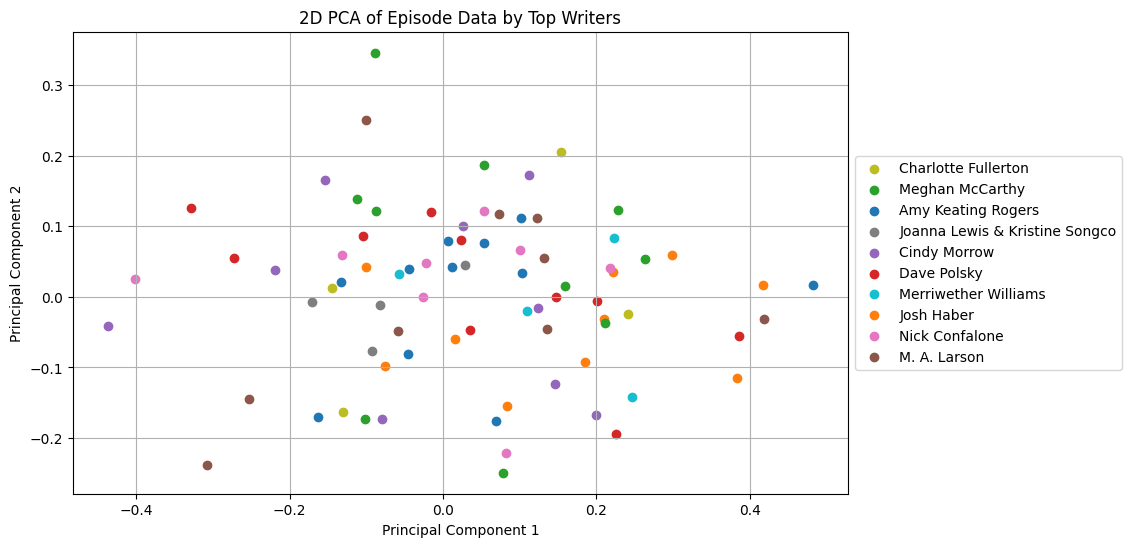

In [ ]:
# Step 1: Extract the episode titles from `episode_emotion_data`
episode_titles = list(episode_emotion_data.keys())

# Step 2: Retrieve the writers for these episodes from the original DataFrame `df`
# First, filter the original DataFrame to include only the episodes we're interested in
df_filtered = df[df['title'].isin(episode_titles)]

# Now, create a mapping from episodes to writers
episode_to_writer = df_filtered.drop_duplicates('title').set_index('title')['writer'].to_dict()

# Step 3: Count the number of episodes for each writer and select the top 10
writer_counts = pd.Series(episode_to_writer.values()).value_counts()
top_writers = writer_counts.head(10).index.tolist()

# Step 4: Filter the PCA data to only include episodes written by the top 10 writers
# Create a list of booleans that are True if the episode's writer is a top writer
top_writer_filter = [episode_to_writer[title] in top_writers for title in episode_titles]

# Apply this filter to the principal_components array
principal_components_top_writers = principal_components[top_writer_filter]

# Create a new list of episode titles that only includes the top writers
episode_titles_top_writers = [title for title in episode_titles if episode_to_writer[title] in top_writers]

# Step 5: Color the PCA points based on the top 10 writers
plt.figure(figsize=(10, 6))
plt.title('2D PCA of Episode Data by Top Writers')

# Generate a color for each top writer
colors = plt.cm.tab10(np.linspace(0, 1, len(top_writers)))
writer_to_color = dict(zip(top_writers, colors))

# Plot the PCA points
for title in episode_titles_top_writers:
    writer = episode_to_writer[title]
    index = episode_titles.index(title)
    color = writer_to_color[writer]
    plt.scatter(principal_components[index, 0], principal_components[index, 1], label=writer, color=color)

# Create a custom legend to avoid duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


#### 4. Character profiles


In [ ]:
df_season1 = df[df["season"]==1]

In [ ]:
ponies = list(df_season1["pony"].unique())

In [ ]:
emotions = list(df_season1["emotion_chatgpt"].unique())

In [ ]:
# Initialize a dictionary to hold the emotion counts for each pony
emotion_counts = {pony: {emotion: 0 for emotion in emotions} for pony in ponies}

# Count the number of times each emotion is expressed by each pony
for pony in ponies:
    for emotion in emotions:
        emotion_counts[pony][emotion] = df[(df['pony'] == pony) & (df['emotion_chatgpt'] == emotion)].shape[0]

# Normalize the counts to get the emotion distribution for each pony
emotion_profiles = {}
for pony in ponies:
    total = sum(emotion_counts[pony].values())
    emotion_profiles[pony] = {emotion: count / total for emotion, count in emotion_counts[pony].items()}

# Find the maximum count for each emotion across all ponies to normalize
max_emotion_counts = {emotion: max(emotion_profiles[pony][emotion] for pony in ponies) for emotion in emotions}

# Normalize the emotion profiles to range 0-1
for pony in ponies:
    for emotion in emotions:
        if max_emotion_counts[emotion] > 0:
            emotion_profiles[pony][emotion] /= max_emotion_counts[emotion]

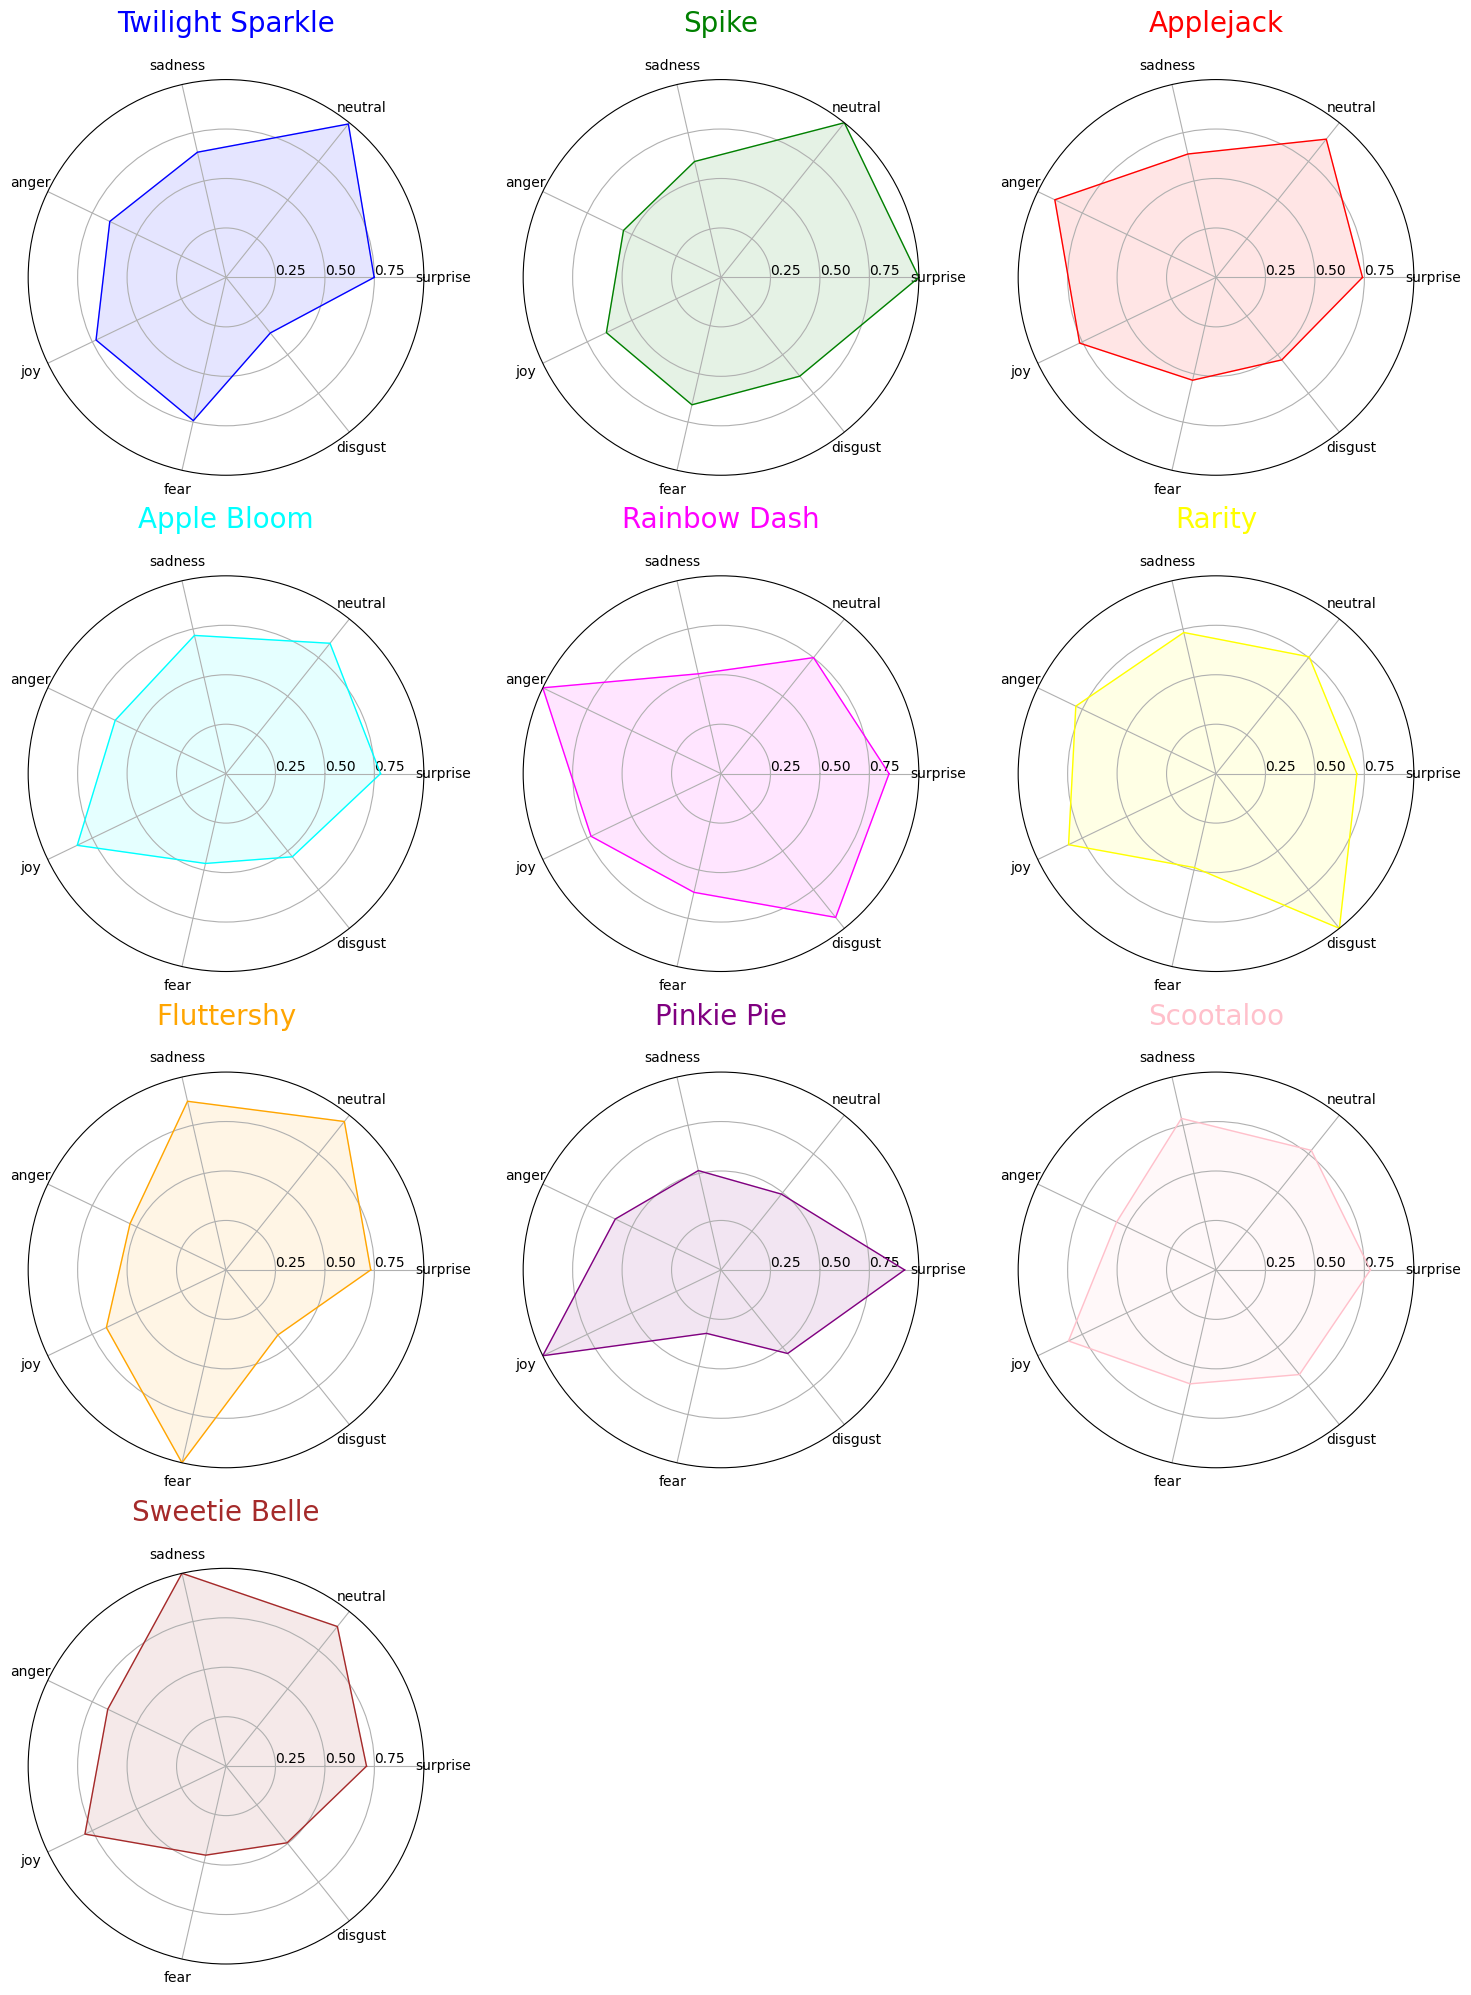

In [ ]:
from math import pi

# Assuming emotion_profiles is a dictionary with normalized values as computed before
# Define colors for each pony for distinction
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'pink', 'brown']

# Define the number of rows needed based on the number of ponies
num_ponies = len(ponies)
num_rows = num_ponies // 3 + (1 if num_ponies % 3 else 0)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5), subplot_kw={'polar': True})
axes = axes.flatten()  # Flatten the array for easy iteration

# Function to create a radar chart for a given pony on a given axis
def create_radar_chart(ax, pony, emotions, values, color):
    # Number of variables
    num_vars = len(emotions)

    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    values += values[:1]
    angles += angles[:1]

    # Draw one axe per variable and add labels
    ax.set_xticks(angles[:-1], emotions)

    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.25, 0.5, 0.75])
    ax.set_ylim(0, 1)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)

    # Fill area
    ax.fill(angles, values, color=color, alpha=0.1)

    # Add a title
    ax.set_title(pony, size=20, color=color, y=1.1)

# Plot the radar charts for each pony
for idx, pony in enumerate(ponies):
    values = [emotion_profiles[pony][emotion] for emotion in emotions]
    create_radar_chart(axes[idx], pony, emotions, values, colors[idx])

# Hide any unused subplots
for idx in range(len(ponies), len(axes)):
    axes[idx].set_visible(False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


#### 5. Writers influence on emotions

In [90]:
writers = list(df["writer"].unique())
writers_value_counts = df["writer"].value_counts()
len(writers_value_counts)

66

In [91]:
cutoff_num_dialogs = 300
sum(writers_value_counts > cutoff_num_dialogs)

20

In [92]:
writers_value_counts_high = writers_value_counts[writers_value_counts > cutoff_num_dialogs]
writers_value_counts_high

Amy Keating Rogers                                                                            2131
Meghan McCarthy                                                                               1856
M. A. Larson                                                                                  1765
Josh Haber                                                                                    1586
Dave Polsky                                                                                   1494
Cindy Morrow                                                                                  1454
Nick Confalone                                                                                1028
Michael Vogel                                                                                  808
Joanna Lewis & Kristine Songco                                                                 792
Charlotte Fullerton                                                                            710
Merriwethe

In [93]:
writers_4 = list(writers_value_counts_high.index)
len(writers_4)

20

In [94]:
df_4 = df[df["writer"].isin(writers_4)]
len(df_4)

18188

In [95]:
table = 100*pd.crosstab(df_4["emotion_chatgpt"], df_4["writer"], normalize="columns").round(3)

In [96]:
table

writer,Amy Keating Rogers,Charlotte Fullerton,Chris Savino,Cindy Morrow,Corey Powell,Dave Polsky,Gillian M. Berrow,Joanna Lewis & Kristine Songco,Josh Haber,Josh Hamilton,Lauren Faust,M. A. Larson,Meghan McCarthy,"Meghan McCarthy, Rita Hsiao, & Michael Vogel; story by Meghan McCarthy & Joe Ballarini[25]",Merriwether Williams,Michael P. Fox & Wil Fox,Michael Vogel,Natasha Levinger,Nick Confalone,Nicole Dubuc
emotion_chatgpt,,,,,,,,,,,,,,,,,,,,
anger,8.9,8.7,10.7,7.6,4.8,7.6,8.8,6.4,6.7,7.6,6.8,9.2,7.0,7.2,12.7,4.1,8.5,6.9,8.7,12.4
disgust,3.2,3.0,2.1,3.0,0.7,2.2,3.3,1.5,1.7,4.1,3.2,3.2,2.2,1.1,1.7,2.0,2.8,1.2,3.1,2.3
fear,6.3,6.1,9.3,5.2,9.8,9.4,5.9,9.0,10.8,4.5,9.7,8.9,10.5,11.6,10.3,3.6,4.2,10.7,5.0,7.2
joy,38.4,37.9,33.9,40.4,42.9,39.2,43.1,40.9,31.4,39.3,34.1,40.6,35.3,39.3,36.1,42.0,39.2,43.8,40.4,33.2
neutral,18.8,26.3,20.5,19.0,18.3,19.1,15.9,18.3,23.2,17.7,19.2,15.0,19.7,11.6,18.3,24.1,23.9,13.2,18.2,18.3
sadness,4.5,4.5,2.9,6.9,5.7,4.4,4.0,4.7,6.9,4.3,4.2,5.5,6.4,4.4,4.3,10.2,5.4,4.3,6.5,7.2
surprise,19.9,13.5,20.5,18.0,17.9,18.1,19.0,19.2,19.3,22.4,22.7,17.7,19.0,24.7,16.7,13.9,15.8,19.9,18.2,19.3


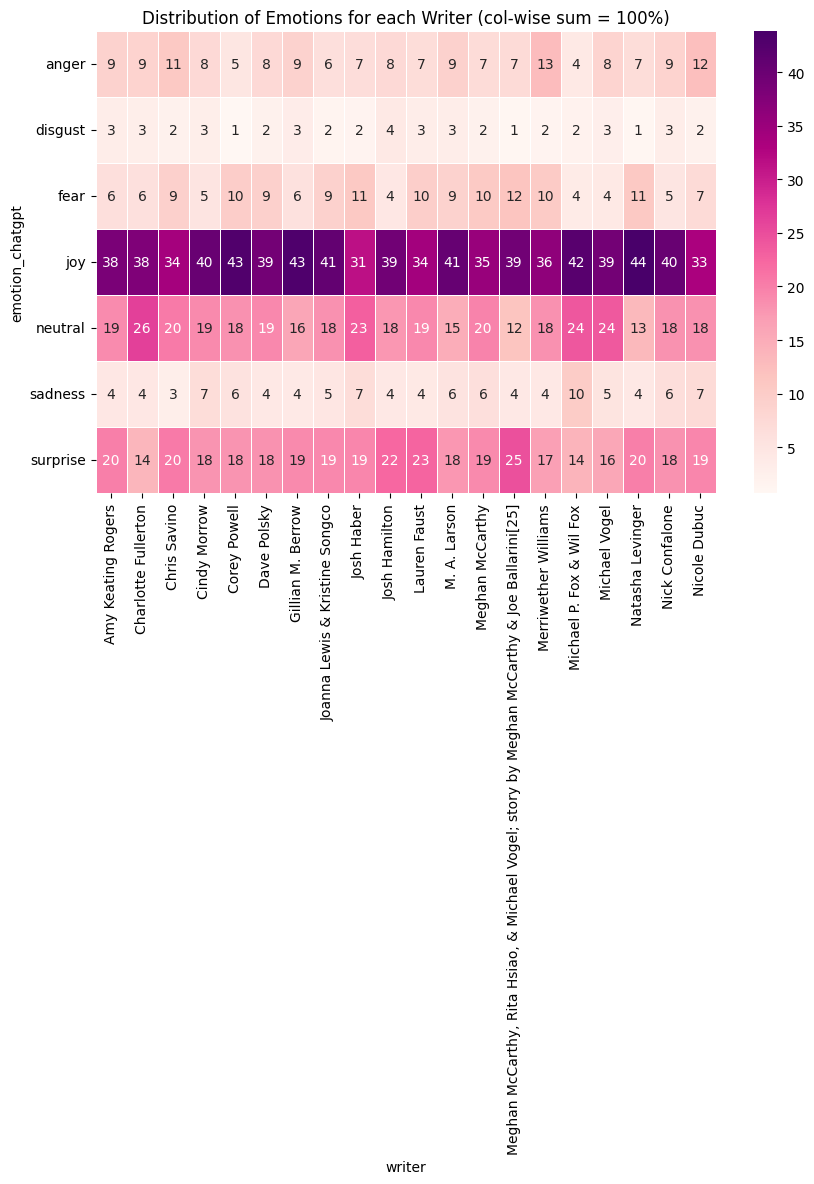

In [99]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(table, annot=True, fmt=".0f", linewidth=.5, cmap = "RdPu", ax=ax)
ax.set_title('Distribution of Emotions for each Writer (col-wise sum = 100%)')
plt.tick_params(axis='both', which='major', top=False, bottom=True, labeltop=False, labelbottom=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()